# Topic Modeling: Top2Vec
- get either full texts, paragraphs or sentences (not cleaned) as input for training
- Recommended for multilingual datasets: 'distiluse-base-multilingual-cased' (pre-trained sentence transformer)
- no specified will use doc2vec method -> not multilingual
- no need to remove stop words
- #### Parameter:
- ngram_vocab: True allows bigrams (no trigrams etc.!)
- min_count: ignore words with smaller total count
- verbose: True to print status duri training

In [1]:
import sys
sys.path.append('../src')
from models import get_top2vec_model

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


loaded spacy language model: en_core_web_sm


In [2]:
top2vec_model = get_top2vec_model('paragraphs')

2022-10-03 20:19:17,815 - top2vec - INFO - Pre-processing documents for training


Top2Vec model not found.
Training new model on 8339 documents.


2022-10-03 20:19:18,450 - top2vec - INFO - Creating joint document/word embedding
2022-10-03 20:20:18,907 - top2vec - INFO - Creating lower dimension embedding of documents
2022-10-03 20:20:43,899 - top2vec - INFO - Finding dense areas of documents
2022-10-03 20:20:44,261 - top2vec - INFO - Finding topics


Saving...


In [3]:
top2vec_model.get_num_topics()

2

In [4]:
words, word_scores = top2vec_model.similar_words(keywords=["Schonberg"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

ValueError: 'schonberg' has not been learned by the model so it cannot be searched.

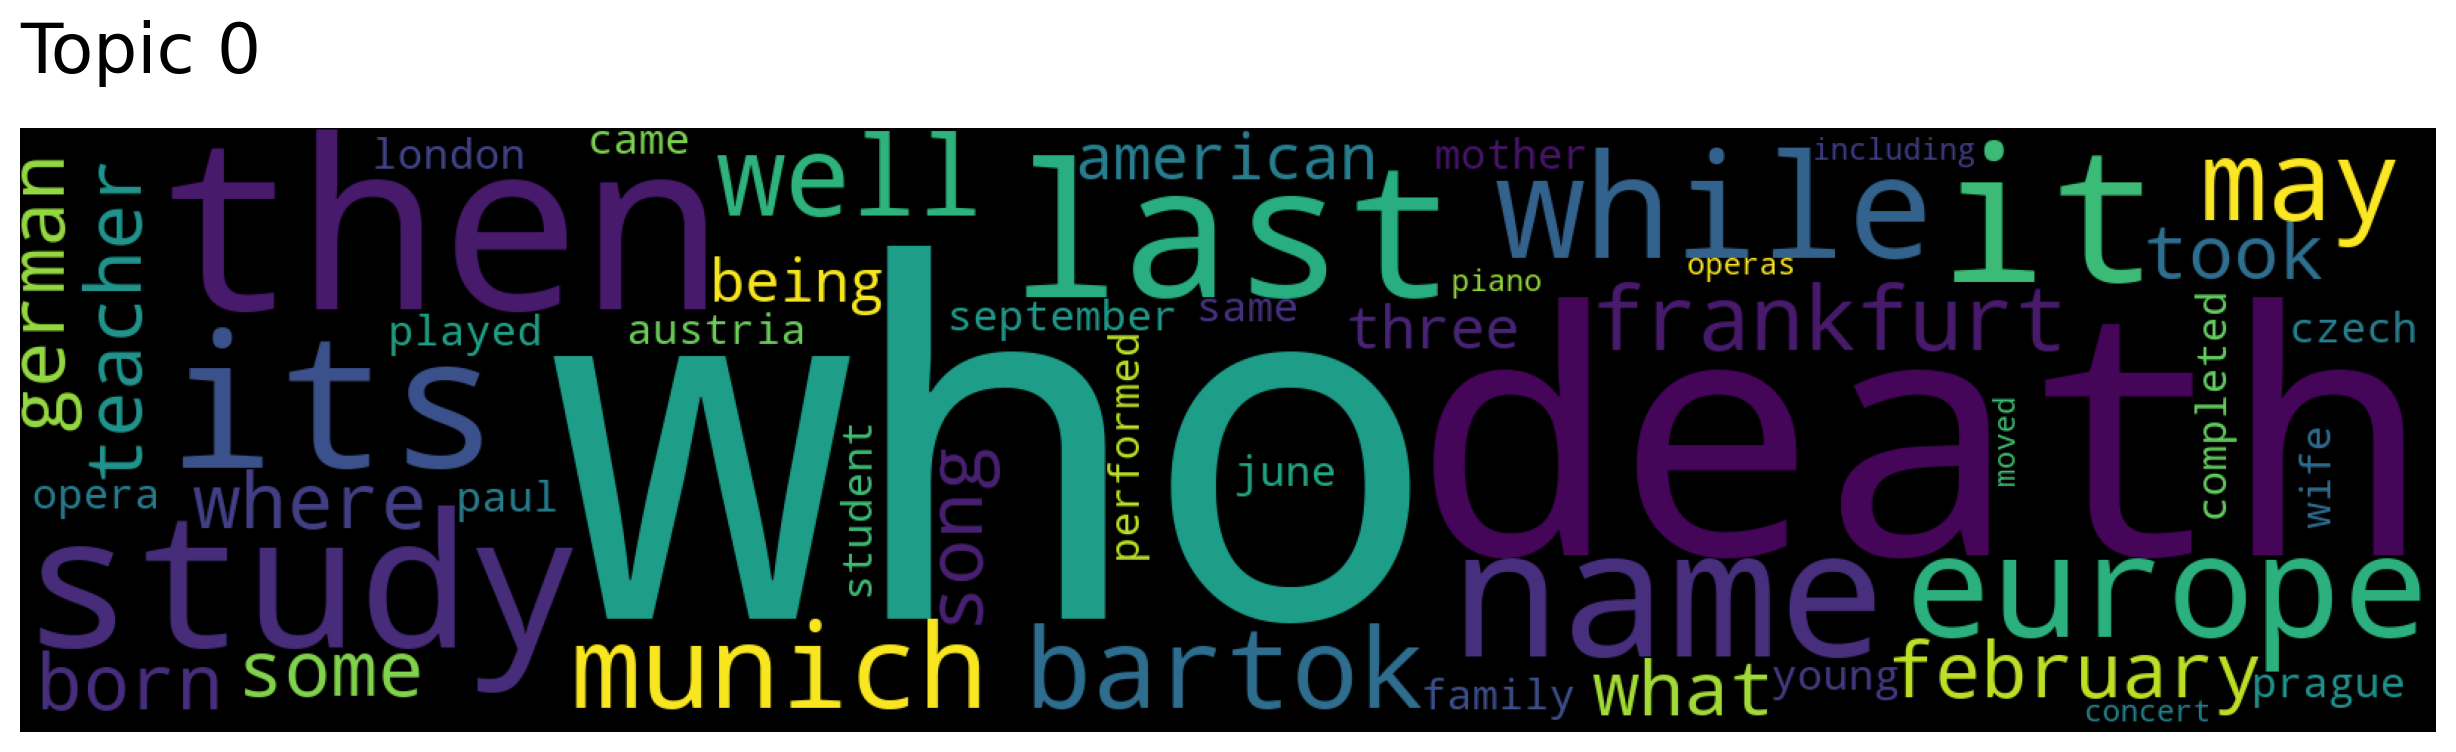

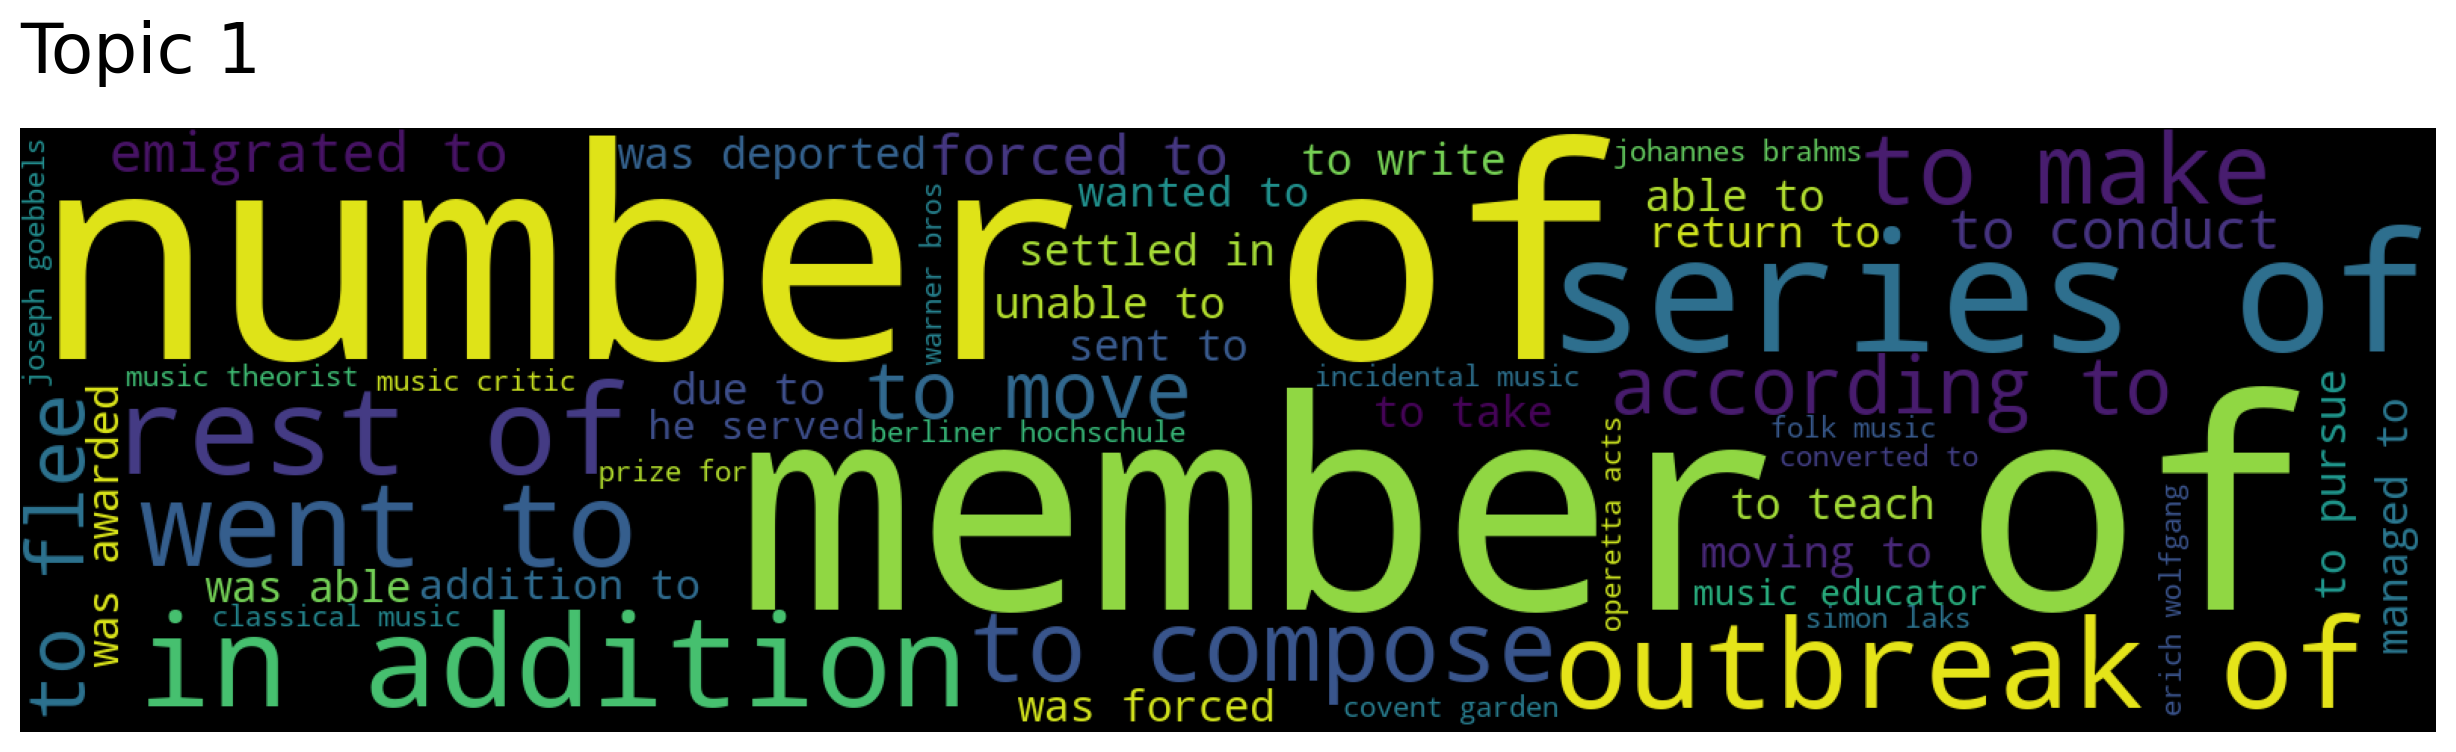

In [4]:
for topic in range(top2vec_model.get_num_topics()):
    top2vec_model.generate_topic_wordcloud(topic)